In [1]:
import pandas as pd
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import TimeSeriesSplit
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.utils import class_weight

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import mutual_info_classif
# from sklearn.model_selection import GridSearchCV


In [28]:
# feature selection
def select_features(inputs, target):
	# configure to select all features
	fs = SelectKBest(score_func=mutual_info_classif, k=5)
	# learn relationship from training data
	fs.fit(inputs, target)
	return fs

In [3]:
df_numeric=pd.read_csv('clean_numeric_features.csv')

In [4]:
df_cat =pd.read_csv('clean_categorical_features.csv')

# Categorical Features

In [5]:
df_cat.head()

,Unnamed: 0,Unnamed: 0.1,year,month,month_day,weekday,target_position,target_position (t-1),target_position (t-2),target_position (t-3),...,target_position (t-11),target_position (t-12),target_position (t-13),target_position (t-14),target_position (t-15),target_position (t-16),target_position (t-17),target_position (t-18),target_position (t-19),target_position (t-20)
0,0,20,2017,2,17,4,0,0,0,1,...,0,0,1,0,1,0,0,1,0,0
1,1,21,2017,2,21,1,0,0,0,0,...,0,0,0,1,0,1,0,0,1,0
2,2,22,2017,2,22,2,1,0,0,0,...,0,0,0,0,1,0,1,0,0,1
3,3,23,2017,2,23,3,0,1,0,0,...,0,0,0,0,0,1,0,1,0,0
4,4,24,2017,2,24,4,1,0,1,0,...,1,0,0,0,0,0,1,0,1,0


In [6]:
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 924 entries, 0 to 923
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Unnamed: 0              924 non-null    int64
 1   Unnamed: 0.1            924 non-null    int64
 2   year                    924 non-null    int64
 3   month                   924 non-null    int64
 4   month_day               924 non-null    int64
 5   weekday                 924 non-null    int64
 6   target_position         924 non-null    int64
 7   target_position (t-1)   924 non-null    int64
 8   target_position (t-2)   924 non-null    int64
 9   target_position (t-3)   924 non-null    int64
 10  target_position (t-4)   924 non-null    int64
 11  target_position (t-5)   924 non-null    int64
 12  target_position (t-6)   924 non-null    int64
 13  target_position (t-7)   924 non-null    int64
 14  target_position (t-8)   924 non-null    int64
 15  target_position (t-9)  

# Correlation of categorical features with target value

In [29]:
# feature selection
fs = select_features(df_cat.values, df_cat.target_position.values)

In [30]:

cat_cols=df_cat.columns.tolist()

In [31]:
type(cat_cols)

list

Feature Unnamed: 0: 0.013030
Feature Unnamed: 0.1: 0.005456
Feature year: 0.021911
Feature month: 0.021024
Feature month_day: 0.011598
Feature weekday: 0.000000
Feature target_position: 0.693011
Feature target_position (t-1): 0.000000
Feature target_position (t-2): 0.000000
Feature target_position (t-3): 0.000000
Feature target_position (t-4): 0.000000
Feature target_position (t-5): 0.000000
Feature target_position (t-6): 0.025865
Feature target_position (t-7): 0.000000
Feature target_position (t-8): 0.004344
Feature target_position (t-9): 0.019325
Feature target_position (t-10): 0.000000
Feature target_position (t-11): 0.000000
Feature target_position (t-12): 0.007328
Feature target_position (t-13): 0.000000
Feature target_position (t-14): 0.011750
Feature target_position (t-15): 0.000000
Feature target_position (t-16): 0.000000
Feature target_position (t-17): 0.004465
Feature target_position (t-18): 0.000000
Feature target_position (t-19): 0.000000
Feature target_position (t-20): 0.0

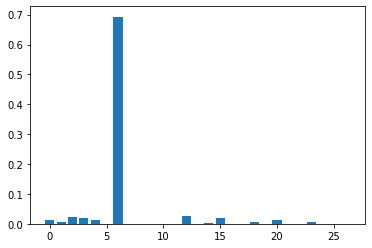

In [32]:
# what are scores for the features
for i in range(len(fs.scores_)):
	print('Feature %s: %f' % (cat_cols[i], fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

In [26]:
cat_cols.sort()

In [27]:
cat_cols

['Unnamed: 0',
 'Unnamed: 0.1',
 'month',
 'month_day',
 'target_position',
 'target_position (t-1)',
 'target_position (t-10)',
 'target_position (t-11)',
 'target_position (t-12)',
 'target_position (t-13)',
 'target_position (t-14)',
 'target_position (t-15)',
 'target_position (t-16)',
 'target_position (t-17)',
 'target_position (t-18)',
 'target_position (t-19)',
 'target_position (t-2)',
 'target_position (t-20)',
 'target_position (t-3)',
 'target_position (t-4)',
 'target_position (t-5)',
 'target_position (t-6)',
 'target_position (t-7)',
 'target_position (t-8)',
 'target_position (t-9)',
 'weekday',
 'year']

# Numerical Features

In [11]:
df_num =pd.read_csv('clean_numeric_features.csv')

In [12]:
df_num.head()

,Unnamed: 0,Unnamed: 0.1,time_spread (t-1),dod_change (t-1),MEH-WTI (t-1),MID (t-1),LLS (t-1),MEH | USGC | HSK (t-1),MEH | USGC | FCC (t-1),WTI | P2 | FCC (t-1),...,WTI | P2 | HSK (t-19),time_spread (t-20),dod_change (t-20),MEH-WTI (t-20),MID (t-20),LLS (t-20),MEH | USGC | HSK (t-20),MEH | USGC | FCC (t-20),WTI | P2 | FCC (t-20),WTI | P2 | HSK (t-20)
0,0,20,0.701220,0.516588,0.496774,0.851942,0.589189,0.380414,0.484068,0.543147,...,0.515812,0.651423,0.509953,0.496774,0.883495,0.572973,0.458255,0.564746,0.602369,0.506676
1,1,21,0.702236,0.508057,0.490323,0.832524,0.583784,0.391086,0.492881,0.542019,...,0.518623,0.658537,0.513744,0.496774,0.885922,0.572973,0.464532,0.571525,0.609701,0.515812
2,2,22,0.713415,0.517536,0.474194,0.822816,0.581081,0.330195,0.412881,0.178229,...,0.526353,0.656504,0.505213,0.483871,0.881068,0.567568,0.478970,0.581695,0.607445,0.518623
3,3,23,0.706301,0.500474,0.464516,0.822816,0.586486,0.386692,0.486780,0.571912,...,0.501757,0.661585,0.511848,0.487097,0.878641,0.562162,0.482737,0.589153,0.616469,0.526353
4,4,24,0.709350,0.509953,0.454839,0.813107,0.581081,0.387320,0.482712,0.548787,...,0.486297,0.661585,0.507109,0.500000,0.883495,0.562162,0.448839,0.549153,0.593909,0.501757


In [13]:
# corr_action=df.corrwith(df['target_position'],method='pearson').abs()
corr_action=df_num.corrwith(df_cat['target_position'],method='kendall').abs()

print(corr_action)

Unnamed: 0                 0.019573
Unnamed: 0.1               0.019573
time_spread (t-1)          0.121343
dod_change (t-1)           0.002349
MEH-WTI (t-1)              0.015660
                             ...   
LLS (t-20)                 0.012849
MEH | USGC | HSK (t-20)    0.047555
MEH | USGC | FCC (t-20)    0.048058
WTI | P2 | FCC (t-20)      0.011001
WTI | P2 | HSK (t-20)      0.015218
Length: 182, dtype: float64


In [14]:
corr_action.sort_values(ascending=False).head(10)

time_spread (t-1)     0.121343
time_spread (t-2)     0.106821
time_spread (t-7)     0.105380
time_spread (t-9)     0.103585
time_spread (t-8)     0.102664
time_spread (t-3)     0.101802
time_spread (t-20)    0.100919
time_spread (t-14)    0.100898
time_spread (t-17)    0.098368
time_spread (t-10)    0.098136
dtype: float64

In [15]:
relevant_num_features = corr_action[corr_action>0.05]

In [16]:
relevant_num_features_col=relevant_num_features.index

In [17]:
selected_num_df = df_num[relevant_num_features_col]  # Only getting columns having corr> 0.1 wrt output

In [18]:
selected_num_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 924 entries, 0 to 923
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   time_spread (t-1)   924 non-null    float64
 1   time_spread (t-2)   924 non-null    float64
 2   time_spread (t-3)   924 non-null    float64
 3   time_spread (t-4)   924 non-null    float64
 4   time_spread (t-5)   924 non-null    float64
 5   time_spread (t-6)   924 non-null    float64
 6   dod_change (t-6)    924 non-null    float64
 7   time_spread (t-7)   924 non-null    float64
 8   time_spread (t-8)   924 non-null    float64
 9   time_spread (t-9)   924 non-null    float64
 10  time_spread (t-10)  924 non-null    float64
 11  time_spread (t-11)  924 non-null    float64
 12  time_spread (t-12)  924 non-null    float64
 13  time_spread (t-13)  924 non-null    float64
 14  dod_change (t-13)   924 non-null    float64
 15  time_spread (t-14)  924 non-null    float64
 16  time_spr

In [19]:
selected_num_df.head()

,time_spread (t-1),time_spread (t-2),time_spread (t-3),time_spread (t-4),time_spread (t-5),time_spread (t-6),dod_change (t-6),time_spread (t-7),time_spread (t-8),time_spread (t-9),...,time_spread (t-12),time_spread (t-13),dod_change (t-13),time_spread (t-14),time_spread (t-15),time_spread (t-16),time_spread (t-17),time_spread (t-18),time_spread (t-19),time_spread (t-20)
0,0.701220,0.691057,0.689024,0.690041,0.693089,0.678862,0.507109,0.678862,0.681911,0.679878,...,0.664634,0.659553,0.502370,0.664634,0.658537,0.661585,0.661585,0.656504,0.658537,0.651423
1,0.702236,0.701220,0.691057,0.689024,0.690041,0.693089,0.506161,0.678862,0.678862,0.681911,...,0.671748,0.664634,0.511848,0.659553,0.664634,0.658537,0.661585,0.661585,0.656504,0.658537
2,0.713415,0.702236,0.701220,0.691057,0.689024,0.690041,0.504265,0.693089,0.678862,0.678862,...,0.675813,0.671748,0.513744,0.664634,0.659553,0.664634,0.658537,0.661585,0.661585,0.656504
3,0.706301,0.713415,0.702236,0.701220,0.691057,0.689024,0.506161,0.690041,0.693089,0.678862,...,0.679878,0.675813,0.510900,0.671748,0.664634,0.659553,0.664634,0.658537,0.661585,0.661585
4,0.709350,0.706301,0.713415,0.702236,0.701220,0.691057,0.509005,0.689024,0.690041,0.693089,...,0.681911,0.679878,0.510900,0.675813,0.671748,0.664634,0.659553,0.664634,0.658537,0.661585


# Filtering highly correlated input features

In [20]:
columns = np.full((pearson_corr.shape[0],), True, dtype=bool)
for i in range(pearson_corr.shape[0]):
    for j in range(i+1, pearson_corr.shape[0]):
        if pearson_corr.iloc[i,j] >= 0.999:
            if columns[j]:
                columns[j] = False

NameError: name 'pearson_corr' is not defined

In [ ]:
filtered_df= selected_df.columns[columns]

In [ ]:
filtered_df

In [ ]:
selected_df=selected_df[selected_df.columns[selected_df.columns.isin(filtered_df)]]

In [ ]:
selected_df.head()

In [ ]:
selected_df.to_csv('final_features.csv')

In [ ]:
x_df=selected_df
y_df=df['target_position']

In [ ]:
# x_train, x_test, y_train, y_test = train_test_split(x_df.values, y_df.values, test_size=0.33, random_state=42)


In [ ]:
cv=TimeSeriesSplit(n_splits=10)

fig, ax = plt.subplots(figsize=(10, 5))
for ii, (train, test) in enumerate(cv.split(x_df, y_df)):
       
    # Plot training and test indices
    l1 = ax.scatter(train, [ii] * len(train), c=[plt.cm.coolwarm(.1)], 
                    marker='_', lw=6)
    l2 = ax.scatter(test, [ii] * len(test), c=[plt.cm.coolwarm(.9)], 
                    marker='_', lw=6)
    ax.set(ylim=[10, -1], title='TimeSeriesSplit behavior', 
           xlabel='data index', ylabel='CV iteration')
    ax.legend([l1, l2], ['Training', 'Validation'])

In [ ]:
x_train=x_df.iloc[train,:-1].values
x_test=x_df.iloc[test,:-1].values
y_train=y_df.iloc[train].values
y_test=y_df.iloc[test].values
x_train.shape, y_train.shape, x_test.shape, y_test.shape

# Naive Bayes

In [ ]:
sample = class_weight.compute_sample_weight('balanced', y_train)
clf_nb = GaussianNB()
clf_nb.fit(x_train, y_train, sample_weight=sample)
clf_nb.fit(x_train, y_train)

In [ ]:
y_pred_nb = clf_nb.predict(x_test)
y_prob_nb=np.round(clf_nb.predict_proba(x_test),2)
print('probabilites on test data are:',y_prob_nb)

In [ ]:
print(" NB Accuracy:"+"{:.2%}".format(metrics.accuracy_score(y_test, y_pred_nb)))
precision, recall, f1_score,_= precision_recall_fscore_support(y_test, y_pred_nb, average='macro')
print("Precision is: {:.2%}, Recall is: {:.2%}, and F1 score is {:.2%}:".format(precision, recall, f1_score))

# Logistic Regression

## Grid Search

####  You can uncomment this section to see effect of Grid search

In [ ]:
# grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
# log_reg=LogisticRegression(solver='liblinear', max_iter=500)
# log_reg_cv=GridSearchCV(log_reg,grid,cv=10)
# clf_lr_gs=log_reg_cv.fit(x_train,y_train)

# print("tuned hpyerparameters :(best parameters) ",log_reg_cv.best_params_)
# print("accuracy :",log_reg_cv.best_score_)

In [ ]:
clf_lr = LogisticRegression(random_state=0).fit(x_train, y_train)
y_pred_lr = clf_lr.predict(x_test)
y_prob_lr=np.round(clf_lr.predict_proba(x_test),2)
print ('probabilities are:',y_prob_lr)


In [ ]:

print(" Logistic Regression Accuracy:"+"{:.2%}".format(metrics.accuracy_score(y_test, y_pred_lr)))
precision, recall, f1_score,_= precision_recall_fscore_support(y_test, y_pred_lr, average='macro')
print("Precision is: {:.2%}, Recall is: {:.2%}, and F1 score is {:.2%}:".format(precision, recall, f1_score))


In [ ]:
# calculate scores
aus_lr = roc_auc_score(y_test, y_pred_lr)

# summarize scores
print('Logistic: ROC AUC=%.3f' % (aus_lr))

# calculate roc curves
lr_fpr, lr_tpr, _ = roc_curve(y_test, y_pred_lr)

# plot the roc curve for the model
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [ ]:
class_names=['Long','Short']
titles_options = [("Confusion matrix", None),     ]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf_lr, x_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

# Testing on new data

In [ ]:
input_row=(x_test[10],)   # here you can give your own input array

In [ ]:
input_row

In [ ]:
y_pred = clf_lr.predict(input_row)

In [ ]:
y_pred

In [ ]:
test_prob=np.round(clf_lr.predict_proba(input_row),2) # results upto 2 decimal places 

In [ ]:
print ('probabilities are:',test_prob)